In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import yfinance as yfin
import constants as cs
import Dates as dates 
import payoff as pf
import VarianceRedFunc as vr 
import GBM as gbm 
import warnings
warnings.filterwarnings("ignore")

%reload_ext autoreload
%autoreload 2

In [6]:
def getdata():
    data = yfin.download(['LONN.SW', 'SIKA.SW'], period= 'max')['Adj Close']
    data.index = data.index.tz_localize(None)
    data = data.loc[cs.initial_fixing_date: cs.final_fixing_date]
    return data 

data = getdata()

[*********************100%***********************]  2 of 2 completed


315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315
315


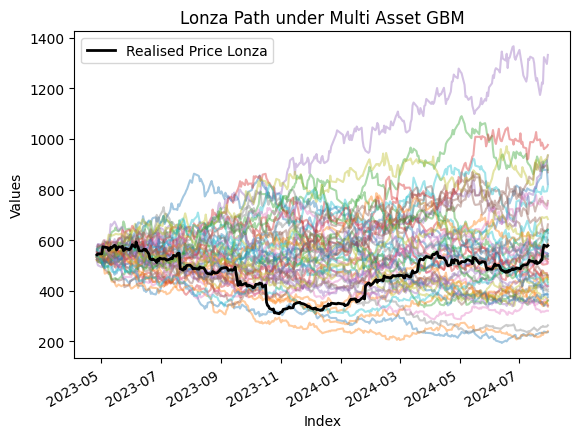

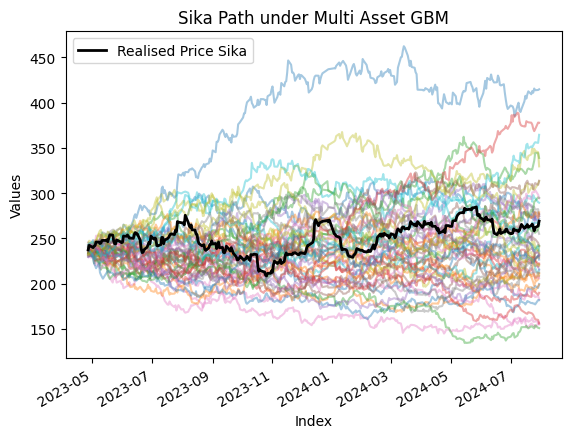

,LONN.SW,SIKA.SW,LONN.SW,SIKA.SW,LONN.SW,SIKA.SW,LONN.SW,SIKA.SW,LONN.SW,SIKA.SW,...,LONN.SW,SIKA.SW,LONN.SW,SIKA.SW,LONN.SW,SIKA.SW,LONN.SW,SIKA.SW,LONN.SW,SIKA.SW
2023-04-27,532.591531,239.043166,520.027998,234.267749,538.019112,238.602279,530.261673,235.024580,558.108895,239.276811,...,546.483380,239.297678,539.637424,237.478724,532.163084,231.899706,537.618217,232.198910,535.954491,237.615325
2023-04-28,531.667868,241.907007,514.217826,238.329463,537.287505,241.792247,524.669438,235.466365,582.741141,243.424376,...,547.578802,235.020090,544.675330,240.764576,515.526132,230.578372,533.311579,233.063501,538.765340,236.561175
2023-05-02,548.361650,248.129886,508.595845,237.447367,515.366593,236.225300,524.991188,233.021709,582.903511,241.686735,...,546.226004,234.540616,553.519917,237.865156,519.452279,234.473053,540.523477,236.750209,516.597550,231.543146
2023-05-03,534.562303,244.871914,503.288393,236.661335,500.018140,229.397899,516.236499,227.421848,582.722292,244.624626,...,532.291030,232.221519,563.476641,241.482759,527.838953,239.093768,556.761287,241.734578,503.525176,227.548915
2023-05-04,529.622807,242.065342,492.629795,233.800413,517.452000,226.114147,522.465922,231.236688,575.234894,242.737213,...,519.524418,225.070945,563.425813,242.055726,534.934198,242.568543,553.768595,242.916803,499.992102,227.301465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,233.427519,194.297967,444.965103,194.612773,553.016294,241.913285,505.450218,229.543617,1223.961854,261.178852,...,659.379605,304.242379,772.332494,301.097922,570.977290,212.596523,691.643619,223.058560,580.419519,352.591543
2024-07-25,232.730054,195.251034,434.191027,194.055505,531.301373,238.547538,503.314962,229.999694,1218.534273,266.291497,...,644.044977,307.554087,748.176008,301.042344,575.044410,216.103151,689.778849,222.386899,594.909643,354.821133
2024-07-26,238.821733,197.507519,450.390287,192.375688,525.793813,238.766174,503.749582,225.792413,1323.737945,273.190532,...,635.844367,311.069844,737.085943,303.322289,570.623155,212.690634,687.995486,219.163180,614.143663,356.171355
2024-07-29,235.818595,195.385833,455.615730,197.152302,529.215127,242.617615,505.910700,222.189132,1296.810070,274.401084,...,635.994027,309.114247,723.671263,298.271442,572.168541,212.477579,692.497831,221.822351,640.241262,355.461428


In [7]:
sim_data_combined = gbm.multi_asset_gbm_n_sims(data = data, nsims = cs.n_sims, fdos = cs.initial_fixing_date, plot = False, plotasset=True)
sim_data_combined

In [8]:
lonza_path = sim_data_combined.iloc[:, ::2]
sika_path = sim_data_combined.iloc[:, 1::2]

In [9]:
params_product = {
    'Denomination': 1000,
    'Coupon_Rate': (0.08 / 252) ,  # Quarterly coupon payments
}

In [10]:
payoff_gbm = pf.payoff(lonza_path, sika_path, params_product, cs.initial_fixing_date)
payoff_gbm

array([ 530.20356857,  910.28009562, 1074.35115786, 1024.52207529,
       1100.        , 1100.        ,  744.98846424,  822.61976276,
        760.25708741, 1093.43665471, 1100.        ,  537.58763977,
       1100.        ,  890.10868694, 1100.        , 1065.84763808,
        860.44941598,  837.66945405,  915.64083321, 1100.        ,
       1095.16463654,  714.6440773 ,  755.46814538,  863.35162299,
        857.68348545,  939.41489776,  683.94622402, 1100.        ,
        889.51631601,  996.52626182,  802.51390728,  725.59700638,
        728.26778174,  749.19450884,  719.41071508, 1100.        ,
        956.81577498,  579.41156523, 1100.        ,  874.5728192 ,
        783.39589909,  980.12027512, 1080.1089638 , 1100.        ,
       1056.44054761, 1100.        , 1100.        ,  983.17620446,
       1014.85584894, 1266.18760019])

# Control Variate 

In [16]:
## Variance reduction for n sims on one specified FDOS using control variate 

theta_cv = vr.cv(lonza_path=lonza_path, sika_path=sika_path, fdos = cs.initial_fixing_date, K = data.loc[cs.initial_fixing_date][0], payoffs_gbm=payoff_gbm)
print(theta_cv)

Variance Reduction Achieved: nan%
nan


In [15]:
data.loc[cs.initial_fixing_date][0]

np.float64(542.1204833984375)

In [ ]:
# iterate Variance reduction process for backtesting (last 60 days of product lifetime )
date_list = dates.get_list_dates(cs.initial_fixing_date, cs.final_fixing_date)
date_list = pd.Series(date_list)
date_list = date_list.tail(10).tolist()
cv_payoff_list = []

for fdos in date_list:
    theta_cv_fdos = vr.cv(lonza_path=lonza_path, sika_path=sika_path, fdos = fdos,
                                      K = data.loc[fdos][0], payoffs_gbm=payoff_gbm)
    cv_payoff_list.append(theta_cv_fdos)

    